/tmp/ipython-input-2665682464.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")


Q1) Number of records: 149

Metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SlNo                 149 non-null    int64         
 1   Release Date         149 non-null    datetime64[ns]
 2   MovieName            149 non-null    object        
 3   ReleaseTime          149 non-null    object        
 4   Genre                149 non-null    object        
 5   Budget               149 non-null    int64         
 6   BoxOfficeCollection  149 non-null    float64       
 7   YoutubeViews         149 non-null    int64         
 8   YoutubeLikes         149 non-null    int64         
 9   YoutubeDislikes      149 non-null    int64         
 10  Month                149 non-null    object        
 11  Year                 149 non-null    int32         
 12  ROI                  149 non-null    float64       
dt

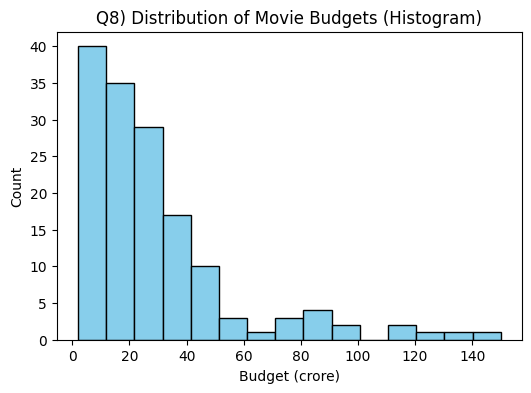

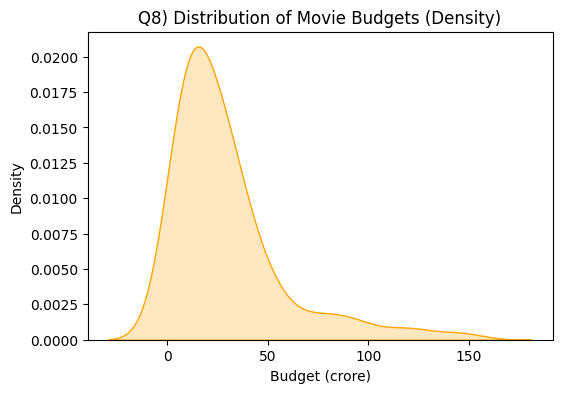

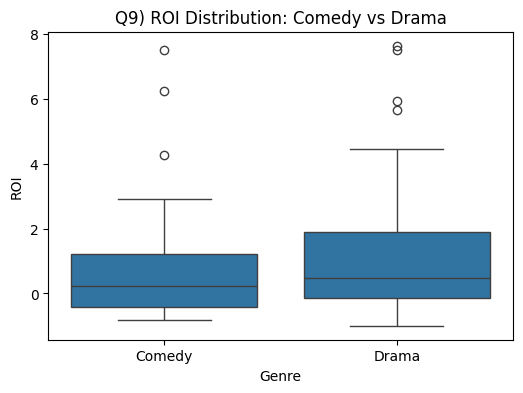


Q10) Correlation between BoxOfficeCollection and YoutubeLikes: 0.6825165877731297
The correlation is Positive


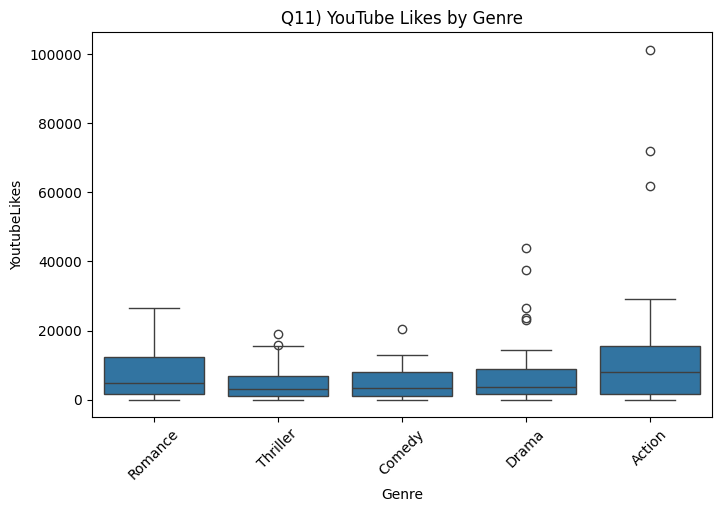


Q12) Correlation Matrix:
                        Budget  BoxOfficeCollection  YoutubeViews  \
Budget               1.000000             0.650401      0.589038   
BoxOfficeCollection  0.650401             1.000000      0.588632   
YoutubeViews         0.589038             0.588632      1.000000   
YoutubeLikes         0.608916             0.682517      0.884055   
YoutubeDislikes      0.665343             0.623941      0.846739   

                     YoutubeLikes  YoutubeDislikes  
Budget                   0.608916         0.665343  
BoxOfficeCollection      0.682517         0.623941  
YoutubeViews             0.884055         0.846739  
YoutubeLikes             1.000000         0.859730  
YoutubeDislikes          0.859730         1.000000  


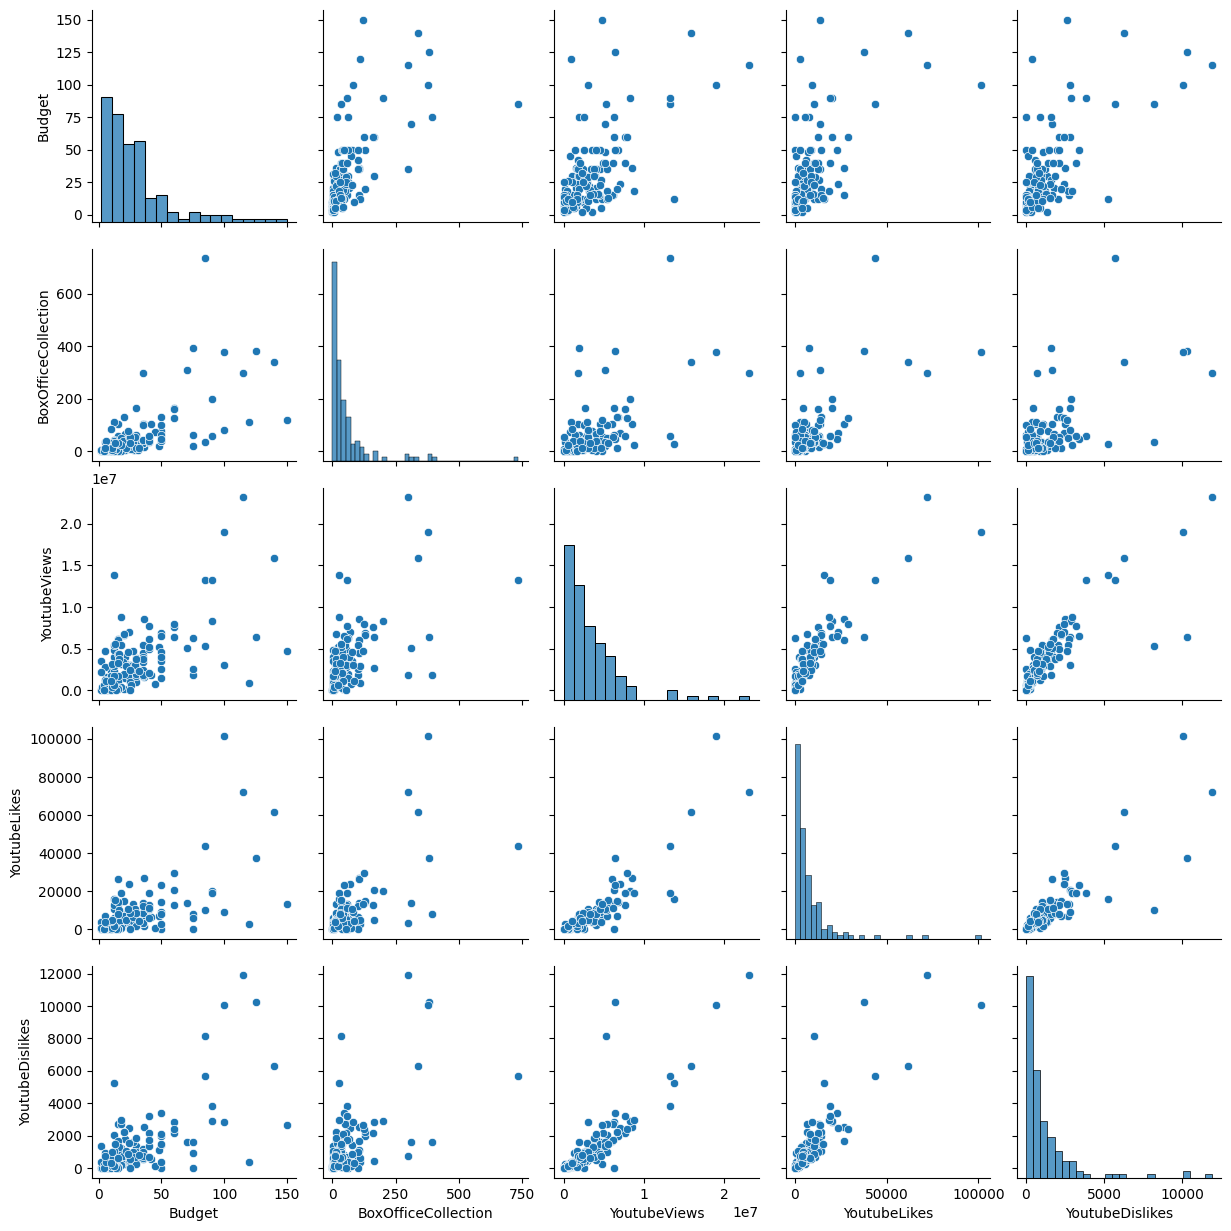

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Bollywood assignment/bollywood - bollywood.csv")

df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")

df["Month"] = df["Release Date"].dt.month_name()
df["Year"] = df["Release Date"].dt.year
df["ROI"] = (df["BoxOfficeCollection"] - df["Budget"]) / df["Budget"]

# ---------------- Q1 ----------------
print("Q1) Number of records:", len(df))
print("\nMetadata:")
print(df.info())

# ---------------- Q2 ----------------
genre_counts = df["Genre"].value_counts()
print("\nQ2) Movies per Genre:\n", genre_counts)
print("Genre with highest releases:", genre_counts.idxmax())

# ---------------- Q3 ----------------
print("\nQ3) Cross-tab Genre vs ReleaseTime:\n")
print(pd.crosstab(df["Genre"], df["ReleaseTime"]))

# ---------------- Q4 ----------------
month_counts = df["Month"].value_counts()
print("\nQ4) Month with most releases:", month_counts.idxmax())

# ---------------- Q5 ----------------
high_budget = df[df["Budget"] >= 25]
hb_month = high_budget["Month"].value_counts()
print("\nQ5) Month with most high-budget releases:", hb_month.idxmax())

# ---------------- Q6 ----------------
top10_roi = df.sort_values("ROI", ascending=False)[["MovieName","ROI"]].head(10)
print("\nQ6) Top 10 movies by ROI:\n", top10_roi)

# ---------------- Q7 ----------------
avg_roi_release = df.groupby("ReleaseTime")["ROI"].mean()
print("\nQ7) Average ROI by ReleaseTime:\n", avg_roi_release)

# ---------------- Q8 ----------------
plt.figure(figsize=(6,4))
plt.hist(df["Budget"], bins=15, color="skyblue", edgecolor="black")
plt.title("Q8) Distribution of Movie Budgets (Histogram)")
plt.xlabel("Budget (crore)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
sns.kdeplot(df["Budget"], fill=True, color="orange")
plt.title("Q8) Distribution of Movie Budgets (Density)")
plt.xlabel("Budget (crore)")
plt.show()

# ---------------- Q9 ----------------
plt.figure(figsize=(6,4))
sns.boxplot(x="Genre", y="ROI", data=df[df["Genre"].isin(["Comedy","Drama"])])
plt.title("Q9) ROI Distribution: Comedy vs Drama")
plt.show()

# ---------------- Q10 ----------------
corr = df["BoxOfficeCollection"].corr(df["YoutubeLikes"])
print("\nQ10) Correlation between BoxOfficeCollection and YoutubeLikes:", corr)
if corr > 0:
    print("The correlation is Positive")
elif corr < 0:
    print("The correlation is Negative")
else:
    print("No correlation")

# ---------------- Q11 ----------------
plt.figure(figsize=(8,5))
sns.boxplot(x="Genre", y="YoutubeLikes", data=df)
plt.xticks(rotation=45)
plt.title("Q11) YouTube Likes by Genre")
plt.show()

# ---------------- Q12 ----------------
cols = ["Budget","BoxOfficeCollection","YoutubeViews","YoutubeLikes","YoutubeDislikes"]
print("\nQ12) Correlation Matrix:\n", df[cols].corr())

sns.pairplot(df[cols])
plt.show()